<a href="https://colab.research.google.com/github/julianovale/BB_Evolution/blob/main/0025_AluraBB_Geopandas01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introdução



In [1]:
! pip install geopandas

     |████████████████████████████████| 1.0MB 5.3MB/s 
     |████████████████████████████████| 15.4MB 191kB/s 
     |████████████████████████████████| 6.6MB 41.7MB/s 


In [18]:
import geopandas as gpd
import pandas as pd

In [3]:
! wget https://caelum-online-public.s3.amazonaws.com/985-geopandas/01/Mapas.zip
! unzip Mapas.zip

--2021-07-11 11:55:09--  https://caelum-online-public.s3.amazonaws.com/985-geopandas/01/Mapas.zip
Resolving caelum-online-public.s3.amazonaws.com (caelum-online-public.s3.amazonaws.com)... 52.216.114.83
Connecting to caelum-online-public.s3.amazonaws.com (caelum-online-public.s3.amazonaws.com)|52.216.114.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2200604 (2.1M) [application/octet-stream]
Saving to: ‘Mapas.zip’

Mapas.zip           100%[===================>]   2.10M  9.57MB/s    in 0.2s    

2021-07-11 11:55:10 (9.57 MB/s) - ‘Mapas.zip’ saved [2200604/2200604]

Archive:  Mapas.zip
   creating: Mapas/
   creating: Mapas/RJ/
  inflating: Mapas/RJ/33MUE250GC_SIR.shx  
  inflating: Mapas/RJ/33MUE250GC_SIR.shp  
  inflating: Mapas/RJ/33MUE250GC_SIR.prj  
  inflating: Mapas/RJ/33MUE250GC_SIR.dbf  


In [4]:
rj = gpd.read_file('/content/Mapas/RJ/33MUE250GC_SIR.shp')
type(rj)

geopandas.geodataframe.GeoDataFrame

In [5]:
  rj.head()

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221..."
1,1469,3300159,APERIBÉ,"POLYGON ((-42.08950 -21.62893, -42.08912 -21.6..."
2,1470,3300209,ARARUAMA,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5..."
3,1471,3300225,AREAL,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1..."
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296..."


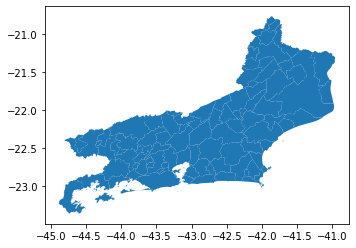

In [6]:
rj.plot()

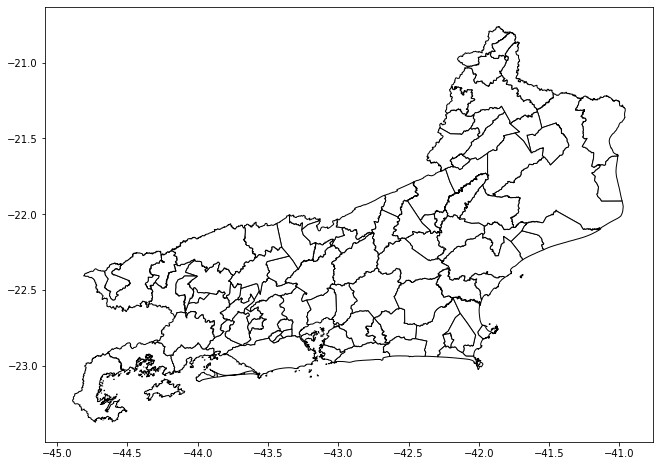

In [7]:
rj.plot(color='white', edgecolor='black', figsize=(15,8))

In [8]:
from shapely.geometry import Polygon, Point, LineString, MultiPolygon

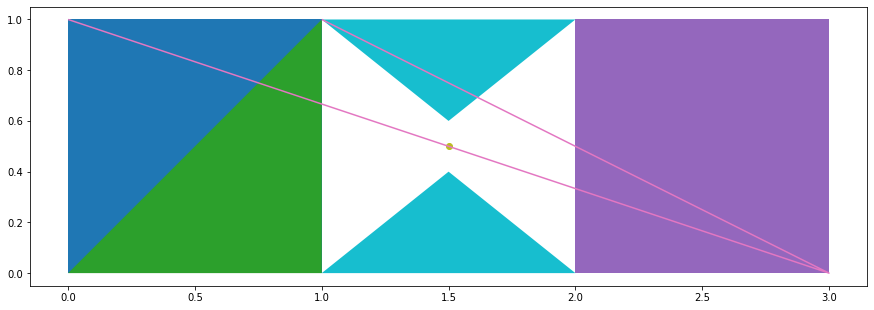

In [9]:
p1 = Polygon([(0,0),(1,0),(1,1),(0,1)])
p2 = Polygon([(0,0),(1,0),(1,1)])
p3 = Polygon([(2,0),(3,0),(3,1),(2,1)])
p4 = LineString([(0,1),(3,0),(1,1)])
p5 = Point(1.5,0.5)
p6 = Polygon([(1,0),(1.5,0.4),(2,0)])
p7 = Polygon([(1,1),(1.5,0.6),(2,1)])
p8 = MultiPolygon([p6, p7])
g = gpd.GeoSeries([p1,p2,p3,p4,p5,p8])
g.plot(cmap='tab10', figsize=(15,8))

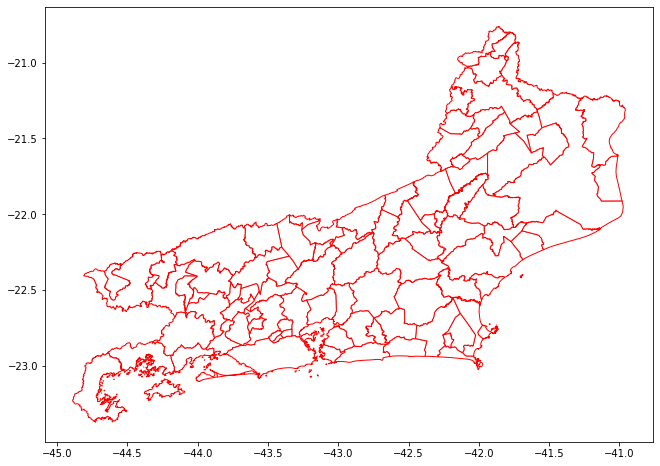

In [10]:
rj.plot(color='white', edgecolor='red', figsize=(15,8))

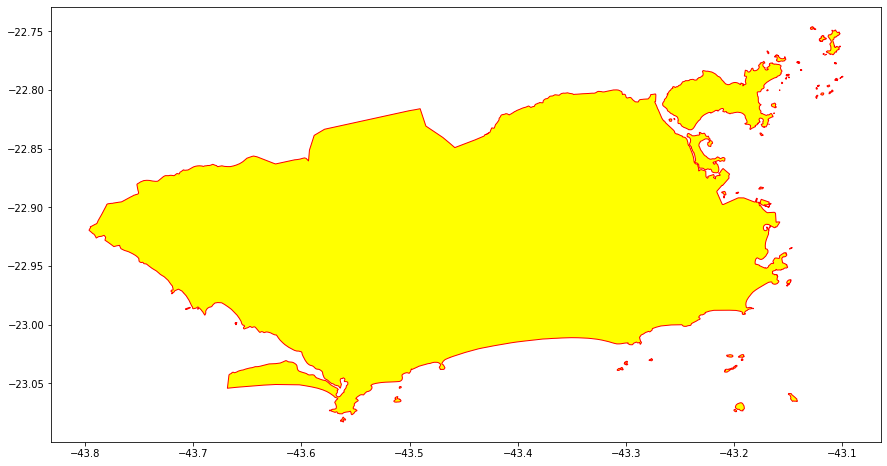

In [11]:
rj_mun = rj[rj['NM_MUNICIP'] == 'RIO DE JANEIRO']
rj_mun.plot(color='yellow', edgecolor='red', figsize=(15,8))

In [12]:
rj_mun

,ID,CD_GEOCODM,NM_MUNICIP,geometry
67,1535,3304557,RIO DE JANEIRO,"MULTIPOLYGON (((-43.12376 -22.80712, -43.12380..."


In [13]:
import os
dir = '/content/Mapas/RJ_Munic'
if not os.path.exists(dir):
  os.makedirs(dir)

In [14]:
rj_mun.to_file(dir + '/RJ_Munic.shp')

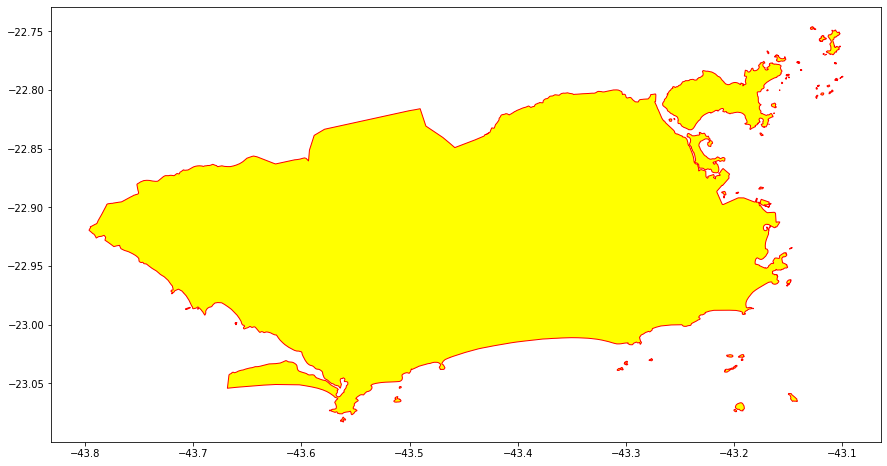

In [15]:
rj_mun = gpd.read_file('/content/Mapas/RJ_Munic/RJ_Munic.shp')
rj_mun.plot(color='yellow', edgecolor='red', figsize=(15,8))

In [16]:
rj_mun

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1535,3304557,RIO DE JANEIRO,"MULTIPOLYGON (((-43.12376 -22.80712, -43.12380..."


In [19]:
texto = 'https://raw.githubusercontent.com/julianovale/BB_Evolution/main/Arquivos/dados.txt'
dados = pd.read_table(texto)

# x = longitude e y = latitude
# zip = gera tuplas

x = zip(dados.Longitude, dados.Latitude)
list(x)

[(-43.4629464, -23.0164552),
 (-43.3369111, -22.9431995),
 (-43.300517, -22.873849),
 (-43.4127033, -22.9847874),
 (-51.92528, -14.235004),
 (-43.477504700000004, -23.0189271),
 (-43.247108700000005, -22.933574899999996),
 (-43.192534, -22.9823004),
 (-51.92528, -14.235004),
 (-43.175411, -22.9364023),
 (-43.262945, -22.918533),
 (-49.0606445, -26.922570899999997),
 (-43.303056, -23.013213),
 (-43.1698189, -22.952982000000002),
 (-43.1849587, -22.970644399999998),
 (-43.354812100000004, -23.0097423),
 (-49.0606445, -26.922570899999997),
 (-43.3461644, -22.938107000000002),
 (-43.181953799999995, -22.9497255),
 (-43.2327966, -22.9218818),
 (-43.3939698, -22.9995191),
 (-43.280851500000004, -22.9055097),
 (-43.1875152, -22.934498),
 (-43.5016663, -23.019108300000003),
 (-43.45904960000001, -23.023215),
 (-43.233903399999996, -22.9936095),
 (-43.1987716, -22.985367999999998),
 (-43.230810600000005, -22.9771863),
 (-43.2525968, -22.926766600000004),
 (-51.92528, -14.235004),
 (-43.18529320

In [20]:
geometry = [Point(x) for x in zip(dados.Longitude, dados.Latitude)]

In [21]:
crs = {'proj' : 'latlong',
       'ellps' : 'WGS84',
       'datum' : 'WGS84',
       'no_defs' : True}

geo_dados = gpd.GeoDataFrame(dados, crs = crs, geometry = geometry)

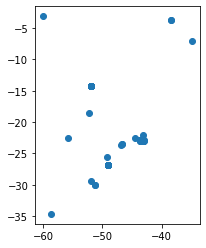

In [22]:
geo_dados.plot()

In [23]:
import os
dir = '/content/Mapas/RJ_DATASET'
if not os.path.exists(dir):
  os.makedirs(dir)

In [24]:
geo_dados.to_file(dir + '/DATASET.shp')

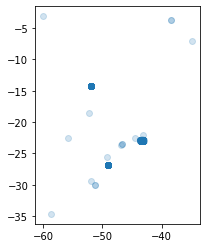

In [25]:
geo_dados.plot(alpha = 0.2)

In [27]:
rj = gpd.read_file('/content/Mapas/RJ_Munic/RJ_Munic.shp')
geo_dados = gpd.read_file('/content/Mapas/RJ_DATASET/DATASET.shp')

In [29]:
# para ver o CRS - Coordinate Reference System


rj.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [30]:
geo_dados.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Para afinar os sistemas de referencias:

sites: https://www.spatialreference.org/

https://www.lapig.iesa.ufg.br/lapig/cursos_online/gvsig/a_projeo_utm_no_brasil.html

Entrar em EPSG e procurar o SIRGAS2000, escolher o melhor sistema/fuso. Rio de Janeiro: EPSG:31983: SIRGAS 2000 / UTM zone 23S para coordenadas UTM (metros ou quilômetros).

Entrar e escolher: "Proj4". 

É só copiar: "+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs"

Toquei o "m" de units para "km".

In [31]:
rj = rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
geo_dados = geo_dados.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [32]:
rj.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [33]:
geo_dados.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [36]:
# para gravar a atualização do CRS

rj.to_file('/content/Mapas/RJ_Munic/RJ_Munic.shp')
geo_dados.to_file('/content/Mapas/RJ_DATASET/DATASET.shp')

In [37]:
rj = gpd.read_file('/content/Mapas/RJ_Munic/RJ_Munic.shp')
geo_dados = gpd.read_file('/content/Mapas/RJ_DATASET/DATASET.shp')

In [38]:
rj.crs

<Projected CRS: PROJCS["unknown",GEOGCS["GCS_unknown",DATUM["D_Unk ...>
Name: unknown
Axis Info [cartesian]:
- [east]: Easting (kilometre)
- [north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: D_Unknown_based_on_GRS80_ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [39]:
geo_dados.crs

<Projected CRS: PROJCS["unknown",GEOGCS["GCS_unknown",DATUM["D_Unk ...>
Name: unknown
Axis Info [cartesian]:
- [east]: Easting (kilometre)
- [north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: D_Unknown_based_on_GRS80_ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [40]:
rj

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1535,3304557,RIO DE JANEIRO,"MULTIPOLYGON (((692.576 7476.609, 692.572 7476..."
